This notebook compares the difference between normal computation of the points and computation of the points with multithreading.

In [ ]:
import qmcpy as qp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#cProfile is used to record the execution time of code.
import cProfile
#pstats lets us manipulate and view the results from profiled code.
import pstats

**Defining the functions**

Here we define the different funtion that will be used, where the threading options is toggled by a boolean. I also decided to use a specific test seed to make the experiment easier to produce. 

In [ ]:
test_seed = 24
def natural(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural" ,thread=False)
    points = l.gen_samples(num_ports) 
    return points
def linear(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,thread=False)
    points = l.gen_samples(num_ports) 
    return points
def mps(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,thread=False)
    points = l.gen_samples(num_ports) 
    return points
def natural_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural" ,thread=True)
    points = l.gen_samples(num_ports) 
    return points
def linear_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,thread=True)
    points = l.gen_samples(num_ports) 
    return points
def mps_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,thread=True)
    points = l.gen_samples(num_ports) 
    return points


**Having fixed sample points (2^n) with variable dimension**

Here we run the functions and get their execution times. Trials define the number of times we run each dimension. A larger number of trials give us a larger number of samples, helping to reduce edge cases. 

The results of the profiling are stored into a data frame where a column represents a way of computing and the row is the number of dimensions.

In [ ]:
trials = 5
dimension_list = [50, 100, 200, 500, 1400, 3500]
n = 10
data = {'Dimensions':dimension_list}
dimension_frame = pd.DataFrame(data)
dimension_frame = dimension_frame.set_index('Dimensions')
names = set()

#Functions that are ran, you need to pass a tuple with (function name, name you want to assign)
run_list = [(natural, "natural"),(linear, "linear"),(mps,"mps"),(natural_thread, "natural thread"),(linear_thread,"linear thread"),(mps_thread, "mps thread")]

for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for d in dimension_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, 2 ** n,seed=test_seed)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    dimension_frame[method_name] = times  
stats.sort_stats('cumulative')


names = list(names)  

# To view the data frame uncomment
# print(frame)
 


**Computing the results for constant point number and variable dimension** 

The comparison list compares the different runtimes between each other, dividing the runtime of (a,b) as a/b. Giving the speed up factor with regard to the second function. Meaning that an end result of above 1 would mean function b is faster than function a. Also not that these results are added into the original frame.

In [ ]:
#The functions are referenced by the names they were given eariler in the dataframe.
comparison= [('mps', 'mps thread'), ('linear', 'linear thread'), ('natural', 'natural thread')]



def speed_up_cal(data_frame, compare_list, column_list):
    result = []
    for seq,pro in compare_list:
        result = []
        for x in column_list:
            a = data_frame[seq][x]
            b = data_frame[pro][x]
            result.append(a/b)
        data_frame[seq + " speed-up"] = result


speed_up_cal(dimension_frame, comparison, dimension_list)

#Prints out the data frame with its new results
#print(frame)




**Viewing the results for constant point number and variable dimension** 

This just uses takes the values out of the data frame and graphs them. 

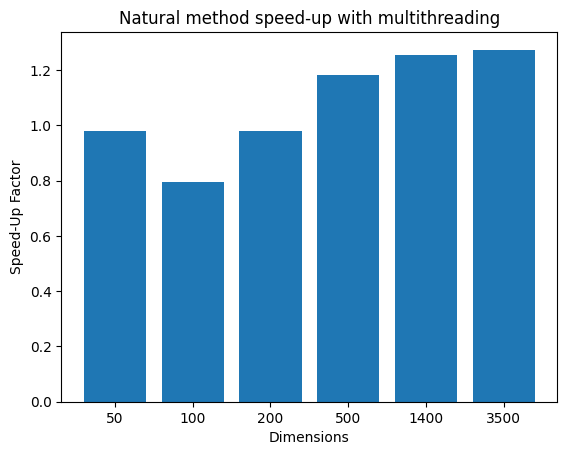

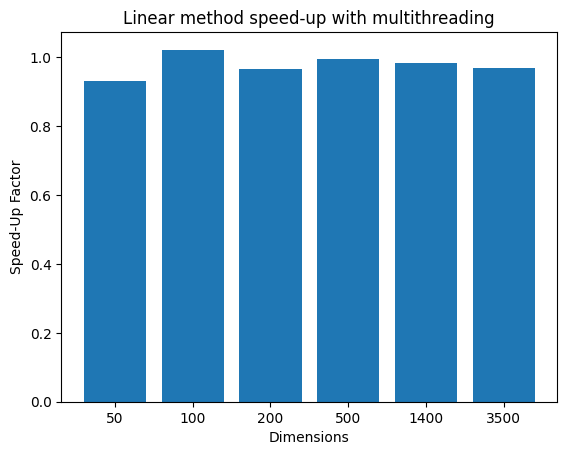

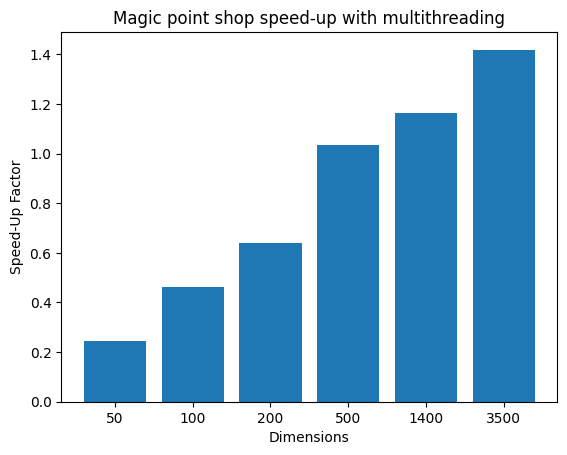

In [7]:
#Converts the column numbers into a string list for showing on the graph.
to_str_list = lambda array: [str(x) for x in array]

y_axis = dimension_frame["natural speed-up"].to_numpy()
x_axis = to_str_list(dimension_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method speed-up with multithreading')
plt.show()

y_axis = dimension_frame["linear speed-up"].to_numpy()
x_axis = to_str_list(dimension_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Linear method speed-up with multithreading')
plt.show()

y_axis = dimension_frame["mps speed-up"].to_numpy()
x_axis = to_str_list(dimension_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop speed-up with multithreading')
plt.show()


**There is a constant dimension (2^n) and variable number of points**

The results of the profiling are stored into a data frame where a column represents a way of computing and the row is the number of dimensions. The computing of the results is also within this cell because the function is already defined.

In [8]:
d = 10
point_list = [10, 100, 1000, 10_000, 15_000]
records = {'Points':point_list}
point_frame = pd.DataFrame(records)
point_frame = point_frame.set_index('Points')


for method, method_name in run_list:
    name = method_name.split(" ")

    names.add(name[0])


    times = []
    
    for p in point_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(2 ** d, p,seed=test_seed)
        profiler.disable()
    
        stats = pstats.Stats(profiler)
        
        process_time = stats.total_tt


        times.append(process_time)
    
    point_frame[method_name] = times  
stats.sort_stats('cumulative')


names = list(names)     

#Speed up computation
speed_up_cal(point_frame, comparison, point_list)

#Uncomment to view frame 
#print(frame2)

**Displaying the results of fixed dimension and variable points**

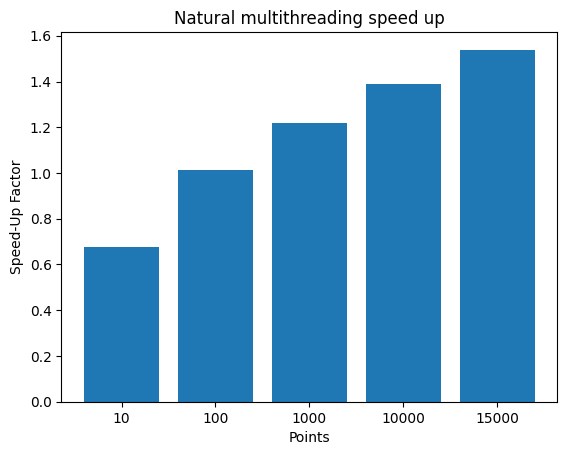

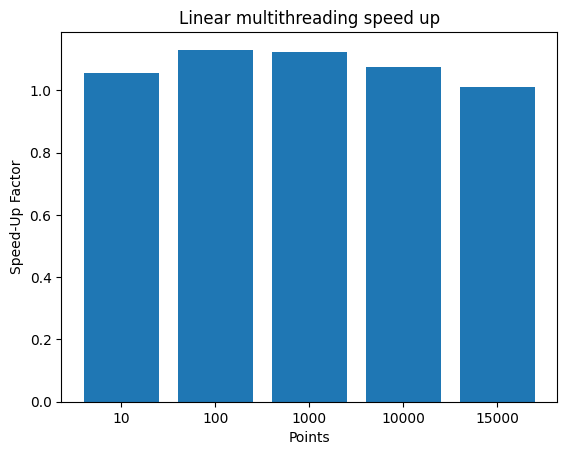

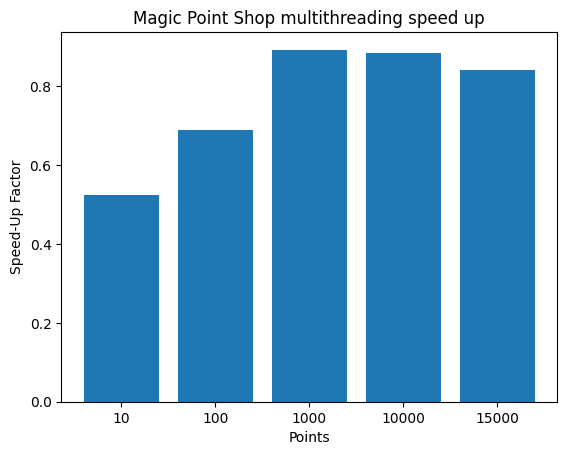

In [9]:
y_axis = point_frame["natural speed-up"].to_numpy()
x_axis = to_str_list(point_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Natural multithreading speed up')
plt.show()

y_axis = point_frame["linear speed-up"].to_numpy()
x_axis = to_str_list(point_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Linear multithreading speed up')
plt.show()

y_axis = point_frame["mps speed-up"].to_numpy()
x_axis = to_str_list(point_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Magic Point Shop multithreading speed up')
plt.show()